title: "Clase 2"
output: html_document
date: "2024-08-05"

In [1]:
#!pip install numpy matplotlib scipy scikit-learn seaborn ace_tools statsmodels

# Clase 2. El modelo de regresión lineal

## Para qué?
Relaciona variables en términos causales, a diferencia del coeficiente de corr.
La corr X y Y es simétrica. La regresión X y Y es distinta de Y y X.
Entonces. Es una técnica que utilizamos para predecir una variable en función
de otra u otras. 

El ejemplo siguiente muestra como no es simetrica la regresión. AUnque no tiene sentido teorico este ejemplo (citas causando años de estudio) sirve para ilustrarlo

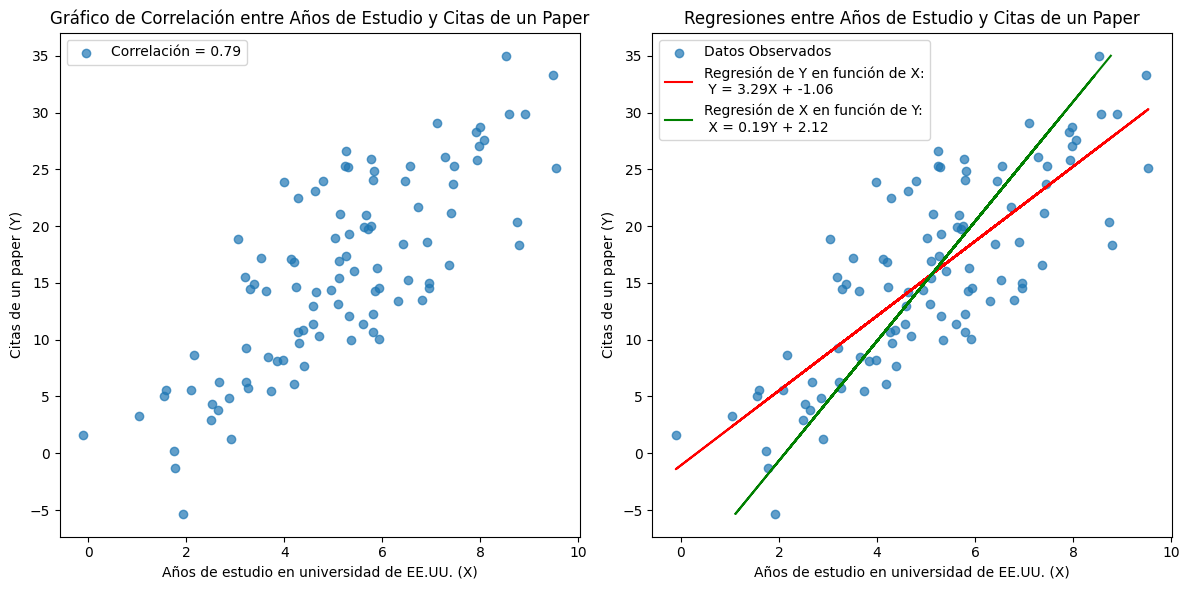

In [2]:
import numpy as np  # Importa la biblioteca NumPy para manipulación numérica y generación de datos aleatorios.
import matplotlib.pyplot as plt  # Importa Matplotlib para generar gráficos.
from scipy.stats import pearsonr  # Importa la función pearsonr de SciPy para calcular la correlación de Pearson.
from sklearn.linear_model import LinearRegression  # Importa la clase LinearRegression para crear modelos de regresión lineal.
from scipy import stats

# Generación de datos simulados
np.random.seed(0)  # Fija una semilla para que los resultados sean reproducibles (los mismos datos aleatorios cada vez).
X = np.random.normal(5, 2, 100)  # Genera 100 valores de una distribución normal para "años de estudio".
# La media es 5, y la desviación estándar es 2, representando el tiempo promedio y variación en años de estudio.
Y = 3 * X + np.random.normal(0, 5, 100)  # Genera "citas del paper" en función de X, con una relación lineal y algo de ruido.
# Cada valor de Y es tres veces X más un ruido aleatorio normal con media 0 y desviación estándar 5.

# Cálculo de la correlación
correlation, _ = pearsonr(X, Y)  # Calcula el coeficiente de correlación de Pearson entre X y Y.
# El coeficiente de Pearson indica la fuerza y dirección de la relación lineal entre las dos variables.
# El segundo valor, ignorado aquí (_), es el valor p asociado a la correlación.

# Gráfico de correlación
plt.figure(figsize=(12, 6))  # Crea una figura de tamaño 12x6 para organizar dos gráficos lado a lado.

plt.subplot(1, 2, 1)  # Define la primera subgráfica en una cuadrícula de 1x2 (dos gráficos en la misma fila).
plt.scatter(X, Y, alpha=0.7, label=f"Correlación = {correlation:.2f}")  # Crea un gráfico de dispersión de X vs. Y.
plt.xlabel("Años de estudio en universidad de EE.UU. (X)")  # Etiqueta del eje X explicando el significado de X.
plt.ylabel("Citas de un paper (Y)")  # Etiqueta del eje Y explicando el significado de Y.
plt.title("Gráfico de Correlación entre Años de Estudio y Citas de un Paper")  # Título que describe el gráfico.
plt.legend()  # Añade una leyenda para mostrar el valor de correlación calculado.

# Modelo de regresión Y en función de X
# reshape(-1, 1) convierte el arreglo 1D X en una matriz 2D de una columna y múltiples filas, necesario para sklearn.
model_Y_X = LinearRegression().fit(X.reshape(-1, 1), Y)  # Ajusta un modelo de regresión lineal para predecir Y usando X.
Y_pred = model_Y_X.predict(X.reshape(-1, 1))  # Genera predicciones de Y en función de los valores de X.
slope_Y_X = model_Y_X.coef_[0]  # Obtiene la pendiente del modelo (coeficiente de X en la ecuación Y = mX + b).
intercept_Y_X = model_Y_X.intercept_  # Obtiene el intercepto del modelo (valor de Y cuando X=0 en la ecuación Y = mX + b).

# Modelo de regresión X en función de Y
# reshape(-1, 1) también convierte Y en una matriz 2D, necesaria para el ajuste del modelo de regresión.
model_X_Y = LinearRegression().fit(Y.reshape(-1, 1), X)  # Ajusta un modelo de regresión para predecir X usando Y.
X_pred = model_X_Y.predict(Y.reshape(-1, 1))  # Genera predicciones de X en función de los valores de Y.
slope_X_Y = model_X_Y.coef_[0]  # Obtiene la pendiente del modelo de X en función de Y.
intercept_X_Y = model_X_Y.intercept_  # Obtiene el intercepto del modelo de X en función de Y.

# Gráfico de regresiones
plt.subplot(1, 2, 2)  # Define la segunda subgráfica en la cuadrícula de 1x2.
plt.scatter(X, Y, alpha=0.7, label="Datos Observados")  # Grafica el mismo diagrama de dispersión de los datos observados.
plt.plot(X, Y_pred, color='r', label=f"Regresión de Y en función de X:\n Y = {slope_Y_X:.2f}X + {intercept_Y_X:.2f}")
# Dibuja la línea de regresión que predice Y usando X, mostrando su ecuación en la leyenda.
plt.plot(X_pred, Y, color='g', label=f"Regresión de X en función de Y:\n X = {slope_X_Y:.2f}Y + {intercept_X_Y:.2f}")
# Dibuja la línea de regresión que predice X usando Y, también con su ecuación.
plt.xlabel("Años de estudio en universidad de EE.UU. (X)")  # Etiqueta del eje X.
plt.ylabel("Citas de un paper (Y)")  # Etiqueta del eje Y.
plt.title("Regresiones entre Años de Estudio y Citas de un Paper")  # Título del gráfico.
plt.legend()  # Añade una leyenda que muestra las ecuaciones de regresión.

plt.tight_layout()  # Ajusta el espaciado entre gráficos para que no se sobrepongan.
plt.show()  # Muestra los gráficos en pantalla.


## Por qué? El problema fundamental de la inferencia causal.  El Pablo de Schrodinger
Regrresión surge en el marco de los estudios observacionales
Pablo es un tipo normal que actualmente vive una situación. No está feliz con su vida.
Pablo, como muchas personas, busca una explicación al porqué y considera (de manera simplista) que el 
problema fundamental de su vida es su pareja. 

Es decir, tiene la hipótesis de que D (su pareja) ha causado Y (una calidad de vida baja)
                  D → Y
                  
De qué manera Pablo podría probar su hipótesis? 

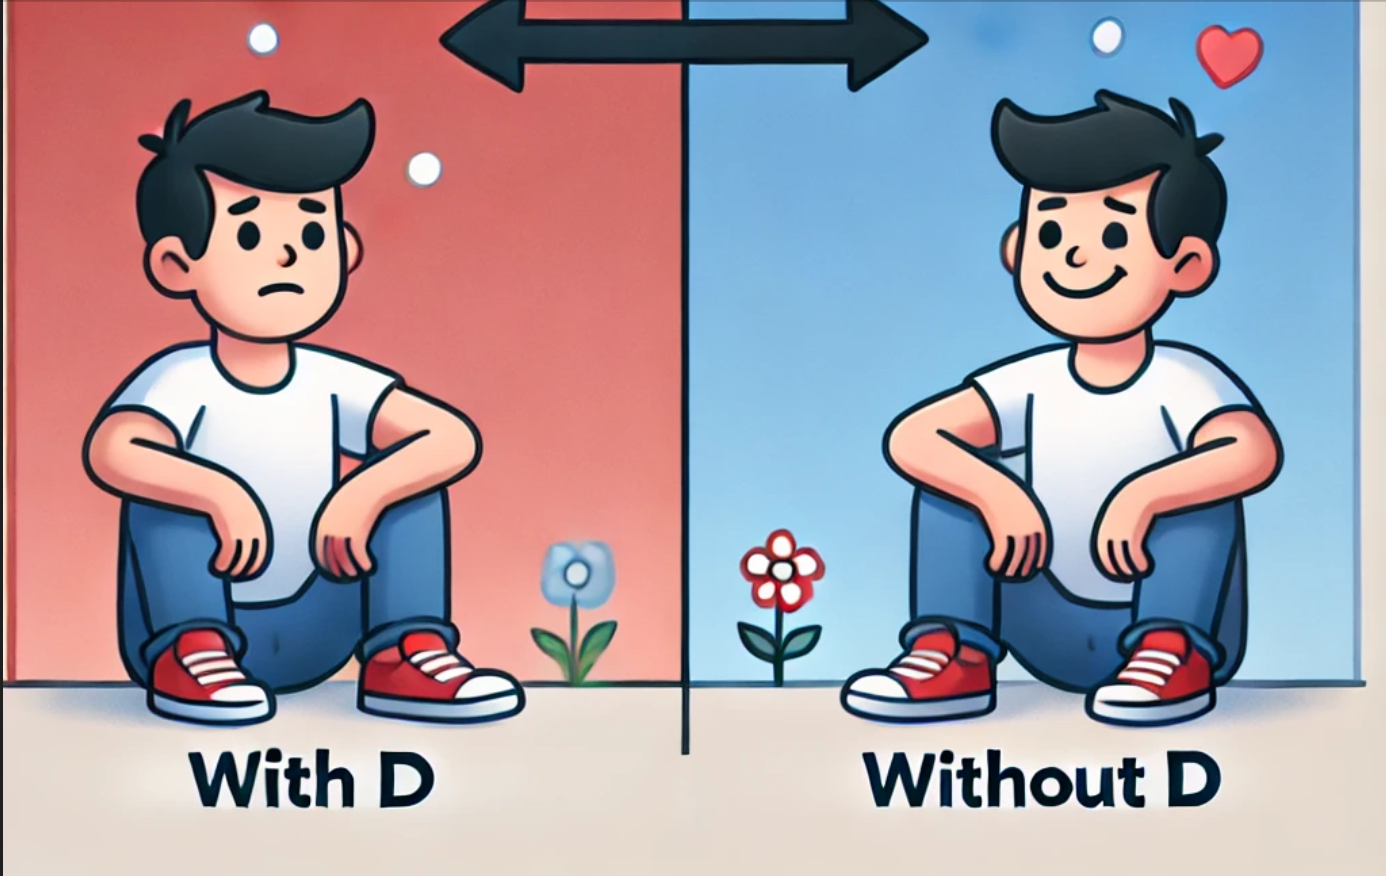

## Respuesta 
Pudiendo conocer si su vida hubiese sido mejor si, Pablo del pasado
no hubiese iniciado una relación con la persona que actualmente es su pareja
y comparar su calidad de vida en ambas situaciones.

## Por qué?
Por qué en otro momento, cambiaron las circunstancias que también afectan el resultado
de un modo u otro. Y si no es el mismo Pablo se estarían midiendo cosas distintas.
El unico camino sería ese universo paralelo, EL CONTRAFÁCTICO. 

**Esto es lo que se conoce como 'EL MARCO DE LOS ESTADOS POTENCIALES'**
Es decir, hay un estado potencial para el hecho de que Pablo no conociera a su 
pareja (D=0, con pablo Y0) y otro donde Pablo sí la conoció y estableció una 
relación con ella (D=1 con pablo Y1).

Si pudieramos tener información de esos dos estados, si ambos se hubieran realizado, podríamos medir la calidad de vida de ambos pablos y restarlas.
Si al tiempo que conoció a su pareja no ocurrió nada más, es lógico atribuir que la diferencia observada en los niveles de calidad de vida se deben a haber conocido a su pareja. Es decir 
                            δ = y1-y0

Como ya habremos notado, es IMPOSIBLE que pablo haya existido en ambos estados. 
Sólo ocurrió uno. Entonces, no es posible, a nivel individual, medir esa diferencia.

Dado lo anterior, **se encontró que, bajo ciertas circunstancias (Supuestos), es posible
conseguir esta medición pero a nivel agregado**. 

### Resumen del problema y la solución
Problema: un individuo (Y) no puede tener sus mismas características y experimentar
dos estados potenciales. Por lo que no podemos medir el efecto de una intervención
en él.
Solución: elementos Yi pueden experimentar Salidas Yi0 (bajo control) o Yi1 (bajo tratamiento),
a nivel individual y pueden compararse a nivel de grupos (Grupo D=1 vs Grupo D=0). Es decir, a nivel de sus caracteristicas van a tener diferentes medidas de éstas pero van a compartir formar parte de un grupo u otro

**Por qué pueden compararse?**
Por qué bajo diversos escenarios (control aleatorio o cumplimiento de supuestos) Los elementos que van alterar el resultado (errores ϵ) sub o sobreestimando el efecto de D=1 o de D=0 tienden a eliminarse. 

**EJEMPLO**

Pongamos un ejemplo, queremos saber el efecto que tiene la administración de un medicamento (D) sobre el bienestar (Y) en fumadores. Como ya vimos, una persona Yi va a experimentar o bien la administración del medicamento (D=1) o bien estar el el grupo que recibe un placebo (D=0), NO PUEDE ESTAR EN AMBOS. 

Asumamos que está en el grupo de tratamiento (D=1); es posible que un sujeto Yj se le parezca y esté en el grupo de control (D=0), la diferencia en el efecto del medicamento no sería correcta por estas diferencias entre los sujetos que van a alterar el resultado. 

Sin embargo, como ya vimos, a nivel agregado, si los errores se distribuyen normalmente
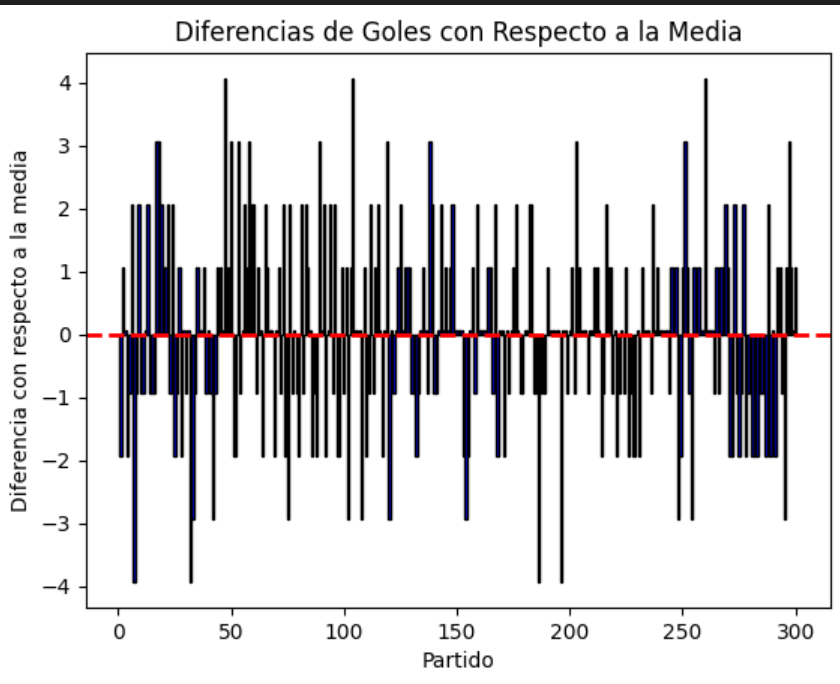

 (después discutimos cuando pasa esto) aquello que subestima o sobreestima la relación de D con Y se elimina. Es decir, se cumple que, para ambos grupos, en ausencia de tratamiento, el valor esperado de ambos grupos (bienestar, sin intervención) es el mismo.

Siguiendo con el ejemplo:

Asumamos que el efecto de D se ve afectado por **fumar, hacer ejercicio y leer**. 
Entonces, en los grupos D=0 o D=1 hay individuos que fuman màs o menos que otros, hacen màs o menos ejercicio o leen màs o menos (la linea base, de la que parten todos los individuos). Cumpliendose ciertas condiciones, en el agregado, el efecto de estas variables se vuelve idéntico en ambos grupos. Y, si no hubiese variables extra, y solo fueran errores aleatorios, igual la suma de 
estos errores es identico en ambos grupos, **entonces dichos errores dejan de ser importantes para evaluar el efecto medio de la intervención.**

### La diferencia de medias
Cuando lo anterior ocurre, basta entonces con obtener el promedio de los outputs (resultados)Y1, que corresponde a quienes recibieron el tratamiento y restarle Y0, que corresponde a la media de quienes no lo recibieron. A nivel de grupos entonces es posible cumplir con:
                              δ = y1-y0
Se conoce como ATE efecto medio del tratamiento.

Esto se cumple cuando la decisión de quienes están en un grupo u otro es aleatoria.

Esto porque D (recibir tratamiento) es independiente del resultado (Y), y **POR DISEÑO LOS EXPERIMENTOS FUNCIONAN DE ESTA MANERA.**

Es esto lo logra la aleatorización. Por esto, en los diseños experimentales, que tienen control sobre esta asignación el problema está resuelto. 

                        Y0,Y1 ⊥ D

## Los estudios Observacionales
Sin embargo, no es el caso en los estudios observacionales. Si los grupos no son seleccionados de manera aleatoria, entonces la media de la linea base (las condiciones de los grupos) simplemente no serán las mismas y la estimación sobre el efecto que se haga en el agregado estará sesgada. SESGO LINEA BASE debido al SESGO DE SELECCIÓN.

Los estudios observacionales son aquellos donde no existe ni dependencia ni independencia de D sobre Y, debido ya que suelen ser registros de situaciones donde el diseño experimental (que permite la aleatorización) no es posible o no es ético.

## Por qué no basta la diferencia de medias en los estudios observacionales?
Entonces, debido a que la configuración de miembros en ambos grupos, misma que cumpla una distribución tal (la normal que vimos en el ejemplo de los goles) que haga que el error sea el mismo en ambos es mucho menos probable que todas las otras donde esto no es así, asumimos que en los estudios observacionales no se cumple la condición de independencia. 

Debido a ello, la diferencia de medias en estudios observacionales ofrecerá una estimación sesgada, ya sea subestimada o sobreestimada, la cual se conoce como **el estimador inocente**. 

En este punto dejaremos la discusión aquí para hablar sobre el modelo de regresión lineal.
Esta introducción es importante para que los conceptos que ahora vamos a tratar 
sean mejor entendidos, ya que es en el marco del problema fundamental de inferencia causal
recién referido que esta tiene sentido. 

# El modelo de regresión
## **El modelo de regresión**
En el marco de lo que hemos discutido, el modelo sirve para obtener el efecto que tiene una variable X sobre una variable Y (decimos tratamiento cuando esta variable es dicotomica), así que la diferencia de medias es parte de los resultados del modelo de regresión. 

Sin embargo, veremos cómo no basta con tener el efecto de la variable X para poder predecir, teniendo un valor especifico para X (Xi) el valor de la variable Y. Esto es así debido a que, a diferencia de la Esperanza "unidimensional" que vimos en la primera parte de este curso, en el modelo de regresión estamos considerando la existencia de al menos dos variables en juego (X y Y). Ahora veremos a qué me refiero exactamente con esto. 

## Un promedio en dos dimensiones
Cuando hablamos del primedio como esperanza, podemos imaginar que la media es un promedio es una sola dimensión, ya que tenemos un conjunto N de numeros que podemos poner sobre una línea, en la cual, la media es como vimos el valor que consigue que los residuos sean los más pequeños posibles. 

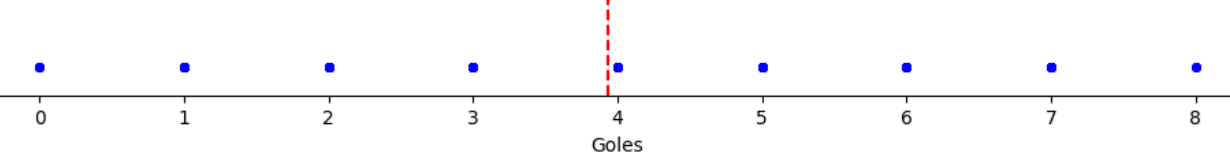


En el modelo de regresión, al involucrar al menos dos variables (en la regresión lineal simple hablamos EXCLUSIVAMENTE de dos variables) los valores que tenemos necesariamente deben aparecer en un plano, donde se asocia un valor Xi con un valor Yi, es decir, valor específicos para cada Variable X y Y. 

Supongamos el siguiente ejemplo que le da nombre a la regresión. La relación causal entre la estatura de los padres (eje X, variable independiente, es decir variable causal o también conocida como Regresor) y la estatura de los hijos (Eje Y, variable dependiente).

A modo de historia rápida, en algún momento se notó que la estatura de la población no crece al infinito, aunque los padres sean altos la estatura de los hijos de esa población "regresaba" hacia el valor medio de la población, con todo y los residuos que eso implica. Es decir, la estatura de los hijos tiene variaciones hacia arriba o hacia abajo del valor de la estatura de los padres, pero siempre el valor esperado de la estatura de los hijos es la media de la población. 

La representación cartesiana de este fenómeno se ve de la siguiente forma


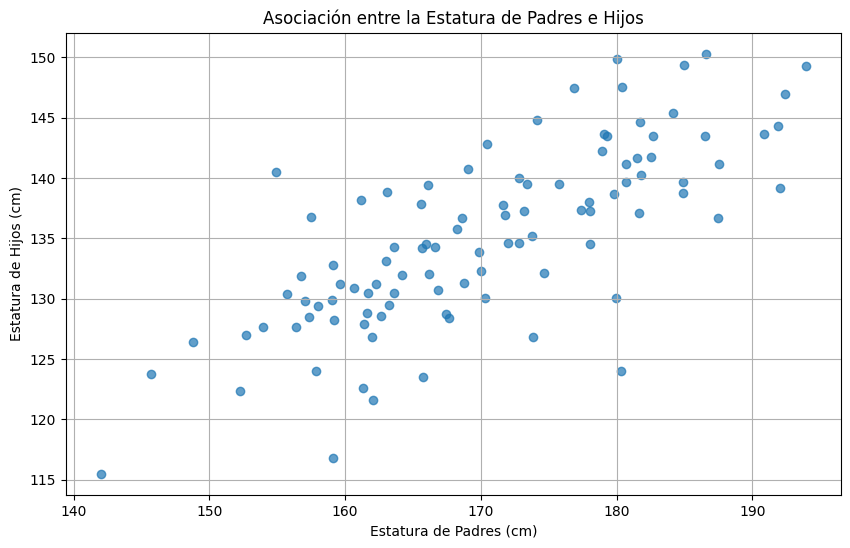

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Establecer la semilla para reproducibilidad
np.random.seed(123)

# Generar datos simulados para estatura de padres e hijos
# Supongamos que la estatura de los padres sigue una distribución normal
estatura_padres = np.random.normal(loc=170, scale=10, size=100)

# Generar la estatura de los hijos como una función lineal de la estatura de los padres con algo de ruido
estatura_hijos = 50 + 0.5 * estatura_padres + np.random.normal(loc=0, scale=5, size=100)

# Crear un DataFrame con los datos
df_estatura = pd.DataFrame({
    'Estatura_Padres': estatura_padres,
    'Estatura_Hijos': estatura_hijos
})

# Graficar la asociación entre estatura de padres e hijos
plt.figure(figsize=(10, 6))
plt.scatter(df_estatura['Estatura_Padres'], df_estatura['Estatura_Hijos'], alpha=0.7)
plt.title("Asociación entre la Estatura de Padres e Hijos")
plt.xlabel("Estatura de Padres (cm)")
plt.ylabel("Estatura de Hijos (cm)")
plt.grid(True)
plt.show()


Trabajando en un nivel unidimensional ya vimos que la media es un punto que corta la linea donde aparecen los valores de los que surge el promedio. Trasladando este razonamiento, involucrando dos o más variables, la esperanza no es un punto, sino una linea (dos dimensiones) en un plano o hiperplano. Y así como antes vimos que pueden existir diversos puntos desde los cuales existen diferentes valores para los residuos, en el caso bidimensional del plano donde representamos una asociación de valores existen infinitas lineas desde las cuales existirán diferentes residuos. 


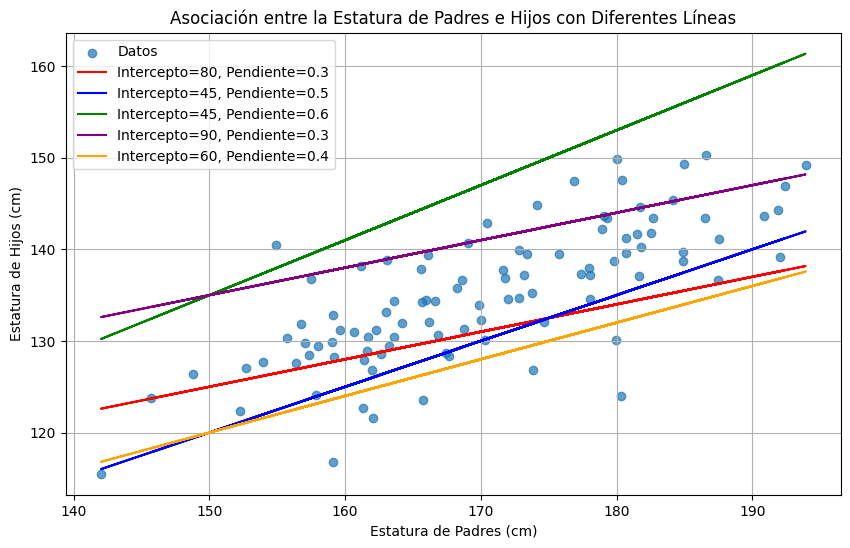

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Establecer la semilla para reproducibilidad
np.random.seed(123)

# Generar datos simulados para estatura de padres e hijos
estatura_padres = np.random.normal(loc=170, scale=10, size=100)
estatura_hijos = 50 + 0.5 * estatura_padres + np.random.normal(loc=0, scale=5, size=100)

# Crear un DataFrame con los datos
df_estatura = pd.DataFrame({
    'Estatura_Padres': estatura_padres,
    'Estatura_Hijos': estatura_hijos
})

# Graficar la asociación entre estatura de padres e hijos con múltiples líneas
plt.figure(figsize=(10, 6))
plt.scatter(df_estatura['Estatura_Padres'], df_estatura['Estatura_Hijos'], alpha=0.7, label="Datos")

# Añadir varias líneas con diferentes interceptos y pendientes
plt.plot(df_estatura['Estatura_Padres'], 80 + 0.3 * df_estatura['Estatura_Padres'], color="red", label="Intercepto=80, Pendiente=0.3")
plt.plot(df_estatura['Estatura_Padres'], 45 + 0.5 * df_estatura['Estatura_Padres'], color="blue", label="Intercepto=45, Pendiente=0.5")
plt.plot(df_estatura['Estatura_Padres'], 45 + 0.6 * df_estatura['Estatura_Padres'], color="green", label="Intercepto=45, Pendiente=0.6")
plt.plot(df_estatura['Estatura_Padres'], 90 + 0.3 * df_estatura['Estatura_Padres'], color="purple", label="Intercepto=90, Pendiente=0.3")
plt.plot(df_estatura['Estatura_Padres'], 60 + 0.4 * df_estatura['Estatura_Padres'], color="orange", label="Intercepto=60, Pendiente=0.4")

# Configuración del gráfico
plt.title("Asociación entre la Estatura de Padres e Hijos con Diferentes Líneas")
plt.xlabel("Estatura de Padres (cm)")
plt.ylabel("Estatura de Hijos (cm)")
plt.legend()
plt.grid(True)
plt.show()


Ahora, antes de seguir, cómo asociamos el resultado de una variable a la aparición de otra?? El método para asociar un resultado a una variable no es otro que una función. Si solo consideramos la existencia de una coordenada, una posible función para ello podría ser la siguiente

In [5]:
x = 8
Y = 16
# La función podría ser f(Y)= 2X 
resfun = 2*x

print (resfun)

# Aunque también podría ser f(x)= x+8. Es decir, hay infinitas combinaciones de
# operaciones que pueden pasar por ese punto
resfun2=x+8
print (resfun2)

16
16


Al involucrar más coordenadas (más pares de observaciones) la función es más específica, y una función que pase por dos o más puntos es necesariamente la función de una linea recta (siempre y cuando la relación entre variables sea lineal). Recordando, la función de una recta es
                                         y= mX +b. 
Donde m es la pendiente, es decir, la inclinación que representa la relación de cambio entre un punto y otro en términos de sus valores Y y X pues 

                m= (y2-y1)/(x2-x1)
                
**En términos de la exposición anterior, este sería el efecto que tiene una variable sobre otra**

**EL valor de la pendiente es sigma**

Sin embargo, esa misma pendiente puede existir en diferentes partes del plano y tocar diferentes conjuntos de puntos. Por ello, una linea que toque dos puntos X,Y específicos es una linea que está en un lugar también específico del plano.
Esta ubicación de la pendiente viene dada por el intercepto (b). Que si bien se define como el punto donde la pendiente corta al Eje Y cuando el valor de X es cero, es, para fines prácticos el punto que define la altura a la que se encuentra la linea que corresponde a dos puntos. De manera que permite darle una ubicación espacial específica a la linea de la función.


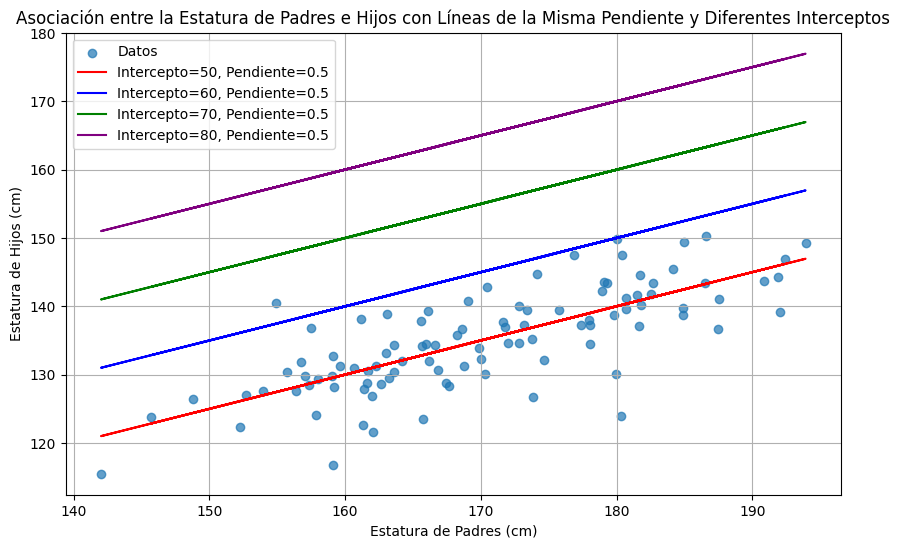

In [6]:
# Graficar la asociación entre estatura de padres e hijos con múltiples líneas
plt.figure(figsize=(10, 6))
plt.scatter(df_estatura['Estatura_Padres'], df_estatura['Estatura_Hijos'], alpha=0.7, label="Datos")

# Añadir varias líneas con la misma pendiente (0.5) pero diferentes interceptos
plt.plot(df_estatura['Estatura_Padres'], 50 + 0.5 * df_estatura['Estatura_Padres'], color="red", label="Intercepto=50, Pendiente=0.5")
plt.plot(df_estatura['Estatura_Padres'], 60 + 0.5 * df_estatura['Estatura_Padres'], color="blue", label="Intercepto=60, Pendiente=0.5")
plt.plot(df_estatura['Estatura_Padres'], 70 + 0.5 * df_estatura['Estatura_Padres'], color="green", label="Intercepto=70, Pendiente=0.5")
plt.plot(df_estatura['Estatura_Padres'], 80 + 0.5 * df_estatura['Estatura_Padres'], color="purple", label="Intercepto=80, Pendiente=0.5")

# Configuración del gráfico
plt.title("Asociación entre la Estatura de Padres e Hijos con Líneas de la Misma Pendiente y Diferentes Interceptos")
plt.xlabel("Estatura de Padres (cm)")
plt.ylabel("Estatura de Hijos (cm)")
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Supongamos que tenemos dos pares de coordenadas para la altura de padres (X) # y de los hijos (Y), valores en cm
# Definir los valores de las coordenadas para altura de padres (X) y altura de hijos (Y)
x1 = 175
x2 = 165
y1 = 170
y2 = 172

# Calcular el valor de la pendiente
pendiente = (y2 - y1) / (x2 - x1)
print (pendiente)

# Calcular el intercepto
intercepto = y1 - (pendiente * x1)
print (intercepto)


-0.2
205.0


Con esto tenemos completa la ecuación de la recta y nuestra función en este caso
es
            f(x)= -0.2X + 205

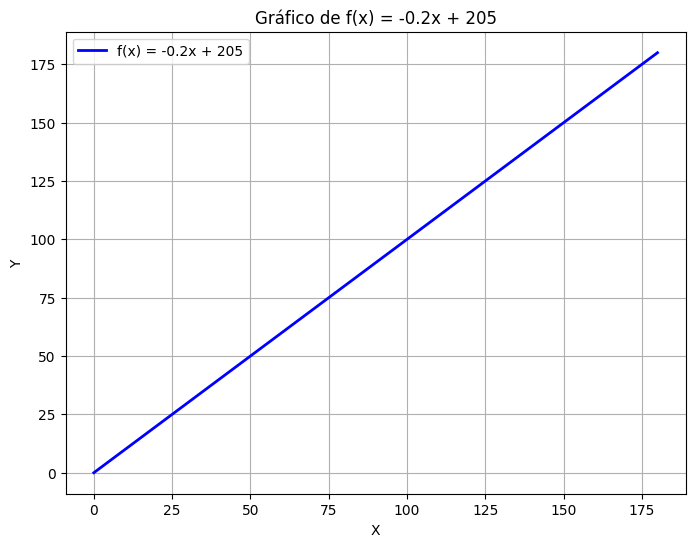

In [8]:
# Ajustar la escala para mostrar el corte en el eje Y cuando X=0
x_values = np.arange(0, 180.5, 0.5)  # Ampliar el rango de X desde 0 hasta 180

# Calcular los valores correspondientes de y
y_values = (x_values)

# Crear el gráfico
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, color="blue", linewidth=2, label="f(x) = -0.2x + 205")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Gráfico de f(x) = -0.2x + 205")
plt.legend()
plt.grid(True)
plt.show()


Este es el procedimiento basico para obtener una linea Antes de seguir, llamemos a los puntos x1y1 padres1 y a los puntos x2y2 padres2.

Como se nota en el ejemplo que acabamos de desarrollar, a partir de los puntos padres1 y padres2, generamos una linea donde aparecen nuevos puntos además de  padres1 y padres2. Tener en mente que estos nuevos puntos encajan de manera perfecta con la función que definimos, ya que, dada una función, los puntos que aparecen al extender la recta que definimos están DETERMINADOS POR DICHA FUNCION.

En ese sentido, la predicción es exacta, no hay lugar a errores. Si tenemos los puntos padres1 y padres2,sabemos con certeza absoluta qué puntos aparecerán ante un valor específico de X. Esto es obvio. 

En este sentido, solo hay una linea posible.

En el caso de una regresión, como vimos en el ejemplo anterior, hay muchas funciones posibles para los puntos. **La relación entre la variable independiente X y la variable dependiente Y NO ES DETERMINISTA. CADA FUNCION QUE PUEDA ESTABLECERSE SE VA A DESVIAR (residuos) DE LA LINEA DE FUNCION MATEMATICA. ES DECIR, LA PREDICION SIEMPRE TENDRÁ ERRORES. NO EXISTE LINEA QUE HAGA QUE TODAS LAS OBSERVACIONES SE COLOQUEN DENTRO DE ELLA. LO MAS A LO QUE PODEMOS LLEGAR ES A UNA LINEA QUE MINIMICE LA DISTANCIA DE TODOS LOS PUNTOS CON RELACION A ELLA**

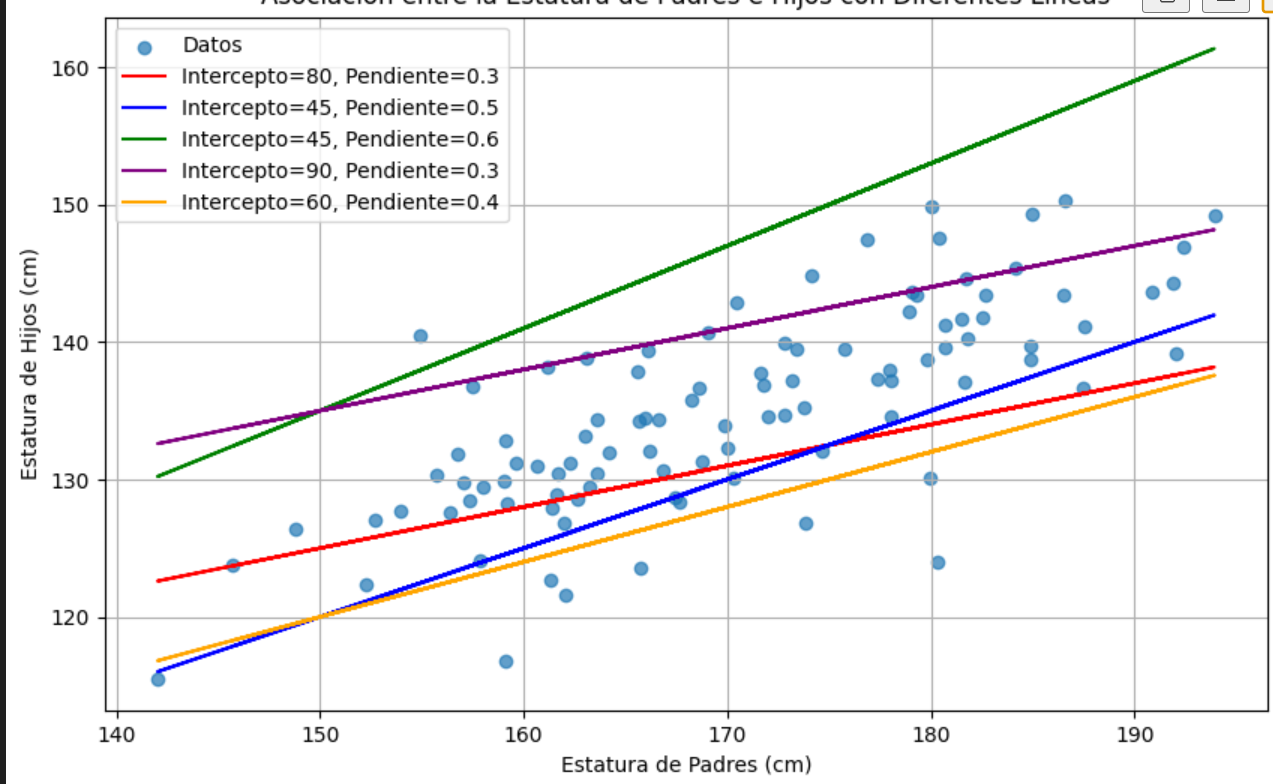

Llegamos a la idea intuitiva
* **EN ESTE SENTIDO, BUSCAMOS UNA LINEA QUE SEA LA PROMEDIO DE TODAS LAS LINEAS POSIBLES**

* **DE MANERA QUE LA ESPERANZA DE LA PREDICCION TENGA LA MENOR SUMATORIA DE RESIDUOS**.

Este es el fundamento de la regresión linea simple


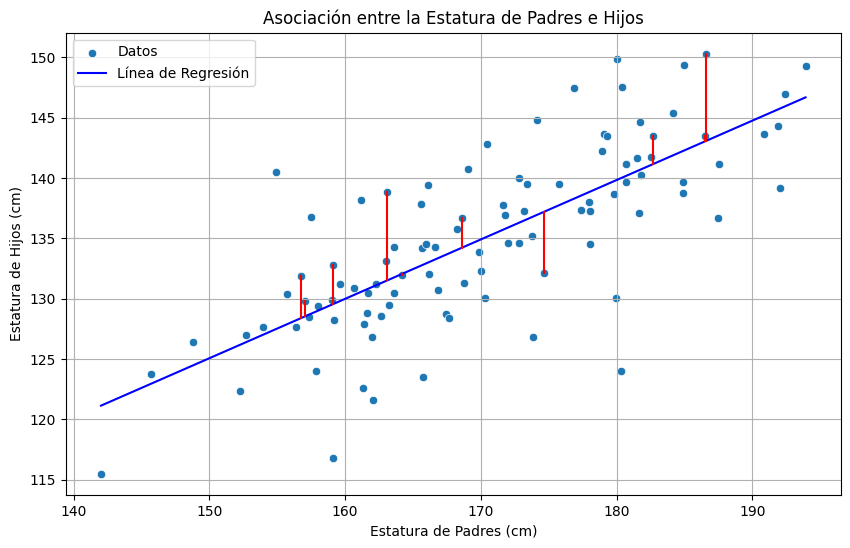

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

# Establecer la semilla para reproducibilidad
np.random.seed(123)

# Generar datos simulados para estatura de padres e hijos
estatura_padres = np.random.normal(loc=170, scale=10, size=100)
estatura_hijos = 50 + 0.5 * estatura_padres + np.random.normal(loc=0, scale=5, size=100)

# Crear un DataFrame con los datos
df_estatura = pd.DataFrame({
    'Estatura_Padres': estatura_padres,
    'Estatura_Hijos': estatura_hijos
})

# Ajustar el modelo de regresión lineal
modelo = LinearRegression()
X = df_estatura[['Estatura_Padres']]
y = df_estatura['Estatura_Hijos']
modelo.fit(X, y)

# Obtener los valores predichos
df_estatura['Predicted'] = modelo.predict(X)

# Seleccionar 10 puntos aleatorios para mostrar las distancias
np.random.seed(123)  # Para reproducibilidad
sample_indices = np.random.choice(df_estatura.index, size=10, replace=False)
df_sample = df_estatura.loc[sample_indices]

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Estatura_Padres', y='Estatura_Hijos', data=df_estatura, label="Datos")
sns.lineplot(x='Estatura_Padres', y='Predicted', data=df_estatura, color="blue", label="Línea de Regresión")

# Añadir segmentos que representan las distancias (residuos) entre los puntos y la línea de regresión
for _, row in df_sample.iterrows():
    plt.plot([row['Estatura_Padres'], row['Estatura_Padres']], [row['Estatura_Hijos'], row['Predicted']], color="red")

# Configuración del gráfico
plt.title("Asociación entre la Estatura de Padres e Hijos")
plt.xlabel("Estatura de Padres (cm)")
plt.ylabel("Estatura de Hijos (cm)")
plt.legend()
plt.grid(True)
plt.show()


Como pudimos observar. El cálculo de "predicción" de otros puntos en la ecuación de la recta, que se obtiene a partir de padres1 y padres2, o cualesquiera dos puntos es 
            y = xm + b
            
A lo largo de esta exposición debería haber quedado claro que la diferencia fundamental entre esa ecuación y datos reales es que la realidad no puede seguir ese caracter determinista, ya que hay cuestiones que modifican el comportamiento de las observaciones (los puntos), es decir, hay errores. Por lo cual, para predecir un valor cualquiera vimos que, además de la pendiente (efecto del tratamiento) es necesario ubicar espacialmente esta pendiente, además de añadir los errores a los que la función se encuentra sometida ante datos reales. POr ello, la ecuación para obtener esta linea que minimiza los errores y que proporciona el efecto del tratamiento es la siguiente

                            
                            Y=β0+β1X+ϵi
​
    
Donde 
y: Variable dependiente (respuesta).
x: Variable independiente (predictor).
β0: Intercepto del modelo.
β1: Coeficiente de la pendiente.
ϵ: Término de error (residuo).  Aunque, bajo un diseño aleatorio se espera que la sumatoria de los errores sea 0. COmo comentamos antes



Cálculo de los coeficientes
Para calcular el intercepto 
𝛽0 y la pendiente β1 de una regresión lineal simple:

Pendiente β1:

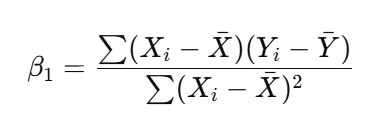

Intercepto β0:

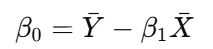

Pronosticar valores a partir de lo calculado

Y^i=β0+β1Xi <-----Valor pronosticado

Para cada predicción calcular el ϵi

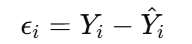

In [10]:

# Calcular las medias de X (Estatura de Padres) y Y (Estatura de Hijos)
mean_X = df_estatura['Estatura_Padres'].mean()
mean_Y = df_estatura['Estatura_Hijos'].mean()

# Calcular las desviaciones (X_i - mean_X) y (Y_i - mean_Y), su cuadrado y producto, para cada punto
df_estatura['X_i - mean_X'] = df_estatura['Estatura_Padres'] - mean_X
df_estatura['Y_i - mean_Y'] = df_estatura['Estatura_Hijos'] - mean_Y
df_estatura['(X_i - mean_X)^2'] = df_estatura['X_i - mean_X'] ** 2
df_estatura['(X_i - mean_X)*(Y_i - mean_Y)'] = df_estatura['X_i - mean_X'] * df_estatura['Y_i - mean_Y']

# Seleccionar una muestra de 10 puntos aleatorios para ilustrar el cálculo en la tabla
np.random.seed(123)  # Para reproducibilidad
sample_indices = np.random.choice(df_estatura.index, size=10, replace=False)
df_sample_proceso = df_estatura.loc[sample_indices, [
    'Estatura_Padres', 'Estatura_Hijos', 'X_i - mean_X', 'Y_i - mean_Y',
    '(X_i - mean_X)^2', '(X_i - mean_X)*(Y_i - mean_Y)'
]]

# Añadir una fila de sumatorias necesarias para el cálculo de las betas
sumatorias = {
    'Estatura_Padres': ['Sumatorias'],
    'Estatura_Hijos': [''],
    'X_i - mean_X': [df_estatura['X_i - mean_X'].sum()],
    'Y_i - mean_Y': [df_estatura['Y_i - mean_Y'].sum()],
    '(X_i - mean_X)^2': [df_estatura['(X_i - mean_X)^2'].sum()],
    '(X_i - mean_X)*(Y_i - mean_Y)': [df_estatura['(X_i - mean_X)*(Y_i - mean_Y)'].sum()]
}

# Convertir la fila de sumatorias a un DataFrame y añadirla a la muestra
df_sumatorias = pd.DataFrame(sumatorias)
df_proceso_final = pd.concat([df_sample_proceso, df_sumatorias], ignore_index=True)

# Mostrar la tabla con el proceso completo

df_proceso_final



,Estatura_Padres,Estatura_Hijos,X_i - mean_X,Y_i - mean_Y,(X_i - mean_X)^2,(X_i - mean_X)*(Y_i - mean_Y)
0,182.659363,143.460414,1.238827e+01,8.422547e+00,153.469279,104.340801
1,174.684391,132.097237,4.413300e+00,-2.940630e+00,19.477221,-12.977885
2,186.609525,150.281527,1.633843e+01,1.524366e+01,266.944430,249.057527
3,168.599313,136.671393,-1.671778e+00,1.633525e+00,2.794841,-2.730892
4,156.737345,131.891043,-1.353375e+01,-3.146824e+00,183.162263,42.588321
5,159.143694,132.78212,-1.112740e+01,-2.255747e+00,123.818959,25.100593
6,186.514365,143.427893,1.624327e+01,8.390026e+00,263.843971,136.281493
7,157.059147,129.798656,-1.321194e+01,-5.239212e+00,174.555463,69.220173
8,163.11131,138.853601,-7.159781e+00,3.815734e+00,51.262458,-27.319817
9,164.213997,131.983869,-6.057093e+00,-3.053999e+00,36.688379,18.498355


In [11]:
# Calcular beta_1 usando las sumatorias
beta_1_numerador = df_estatura['(X_i - mean_X)*(Y_i - mean_Y)'].sum()
beta_1_denominador = df_estatura['(X_i - mean_X)^2'].sum()
beta_1 = beta_1_numerador / beta_1_denominador

print(f"\nCálculo de beta_1 (pendiente):")
print(f"  Numerador = Sumatoria (X_i - mean_X)*(Y_i - mean_Y) = {beta_1_numerador}")
print(f"  Denominador = Sumatoria (X_i - mean_X)^2 = {beta_1_denominador}")
print(f"  Pendiente (β1) = Numerador / Denominador = {beta_1}")

# Calcular beta_0 (intercepto)
beta_0 = mean_Y - beta_1 * mean_X

print(f"\nCálculo de beta_0 (intercepto):")
print(f"  Fórmula: β0 = mean_Y - (β1 * mean_X)")
print(f"  mean_Y = {mean_Y}")
print(f"  mean_X = {mean_X}")
print(f"  Intercepto (β0) = {beta_0}")


Cálculo de beta_1 (pendiente):
  Numerador = Sumatoria (X_i - mean_X)*(Y_i - mean_Y) = 6259.027333680966
  Denominador = Sumatoria (X_i - mean_X)^2 = 12729.26559224331
  Pendiente (β1) = Numerador / Denominador = 0.49170372700016246

Cálculo de beta_0 (intercepto):
  Fórmula: β0 = mean_Y - (β1 * mean_X)
  mean_Y = 135.03786755790108
  mean_X = 170.27109073490357
  Intercepto (β0) = 51.31493764316616


In [12]:
beta_1_sklearn = modelo.coef_[0]  # Pendiente
beta_0_sklearn = modelo.intercept_  # Intercepto

# Imprimir los coeficientes obtenidos
print(f"Coeficiente (Pendiente, β1) usando scikit-learn: {beta_1_sklearn}")
print(f"Intercepto (β0) usando scikit-learn: {beta_0_sklearn}")

Coeficiente (Pendiente, β1) usando scikit-learn: 0.49170372700016246
Intercepto (β0) usando scikit-learn: 51.31493764316616


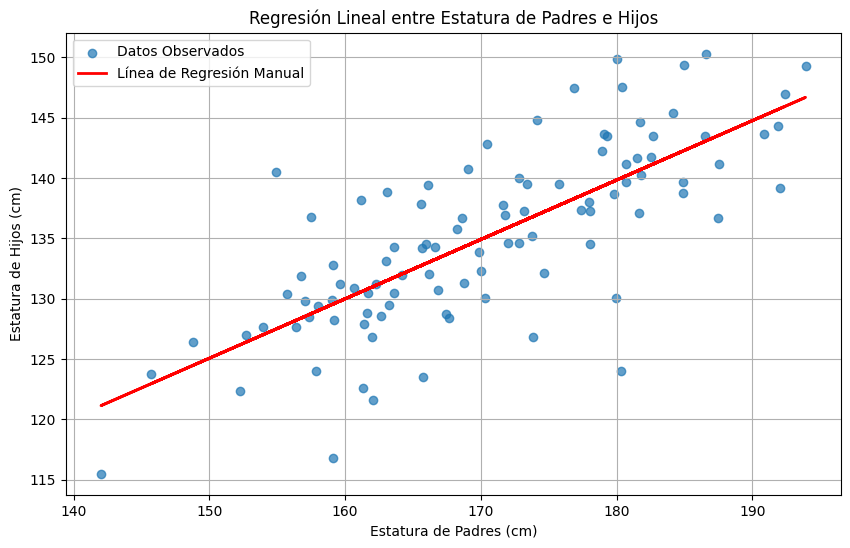

In [13]:
# Generar la línea de regresión manualmente calculada usando beta_0 y beta_1
df_estatura['Estatura_Hijos_Pred'] = beta_0 + beta_1 * df_estatura['Estatura_Padres']

# Crear la gráfica de dispersión de los datos originales y la línea de regresión
plt.figure(figsize=(10, 6))
plt.scatter(df_estatura['Estatura_Padres'], df_estatura['Estatura_Hijos'], label="Datos Observados", alpha=0.7)
plt.plot(df_estatura['Estatura_Padres'], df_estatura['Estatura_Hijos_Pred'], color="red", label="Línea de Regresión Manual", linewidth=2)

# Configuración del gráfico
plt.title("Regresión Lineal entre Estatura de Padres e Hijos")
plt.xlabel("Estatura de Padres (cm)")
plt.ylabel("Estatura de Hijos (cm)")
plt.legend()
plt.grid(True)
plt.show()


Veamos la salida del modelo

In [14]:
import statsmodels.api as sm

# Crear el modelo de regresión lineal usando statsmodels para obtener el resumen completo
X_with_const = sm.add_constant(df_estatura['Estatura_Padres'])  # Añadir una constante para el intercepto
modelo_sm = sm.OLS(df_estatura['Estatura_Hijos'], X_with_const).fit()

# Obtener el resumen del modelo
resultado = modelo_sm.summary()
print(resultado)


                            OLS Regression Results                            
Dep. Variable:         Estatura_Hijos   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     128.3
Date:                Fri, 07 Feb 2025   Prob (F-statistic):           1.66e-19
Time:                        20:35:13   Log-Likelihood:                -299.78
No. Observations:                 100   AIC:                             603.6
Df Residuals:                      98   BIC:                             608.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              51.3149      7.409     

## Supuestos. 

1. Linealidad
Supuesto: Existe una relación lineal entre la variable independiente 𝑋 y la variable dependiente 𝑌
Cómo verificarlo: Puedes visualizar la relación entre 𝑋 e 𝑌 con un gráfico de dispersión. También es común observar los residuos frente a los valores predichos; deberían mostrarse sin patrones claros.

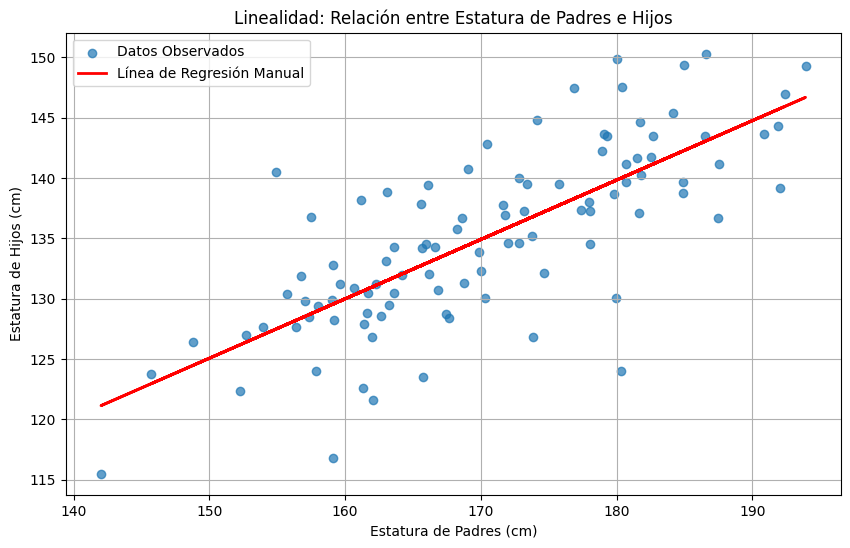

In [15]:
# Graficar la relación entre la variable independiente (Estatura_Padres) y la dependiente (Estatura_Hijos)
plt.figure(figsize=(10, 6))
plt.scatter(df_estatura['Estatura_Padres'], df_estatura['Estatura_Hijos'], label="Datos Observados", alpha=0.7)
plt.plot(df_estatura['Estatura_Padres'], df_estatura['Estatura_Hijos_Pred'], color="red", label="Línea de Regresión Manual", linewidth=2)

# Configuración del gráfico
plt.title("Linealidad: Relación entre Estatura de Padres e Hijos")
plt.xlabel("Estatura de Padres (cm)")
plt.ylabel("Estatura de Hijos (cm)")
plt.legend()
plt.grid(True)
plt.show()


2. Independencia de los errores

Independencia de los errores respecto a sí mismos
Definición: Se refiere a que los errores (o residuos) no deben estar correlacionados entre sí. En otras palabras, el error asociado con una observación no debería depender del error de otra observación.
Importancia: Si los errores están correlacionados entre sí, indica que el modelo puede estar pasando por alto alguna estructura subyacente en los datos que no se está modelando adecuadamente. Por ejemplo, en datos temporales, si los errores están correlacionados, podría haber una estructura temporal (como una tendencia o estacionalidad) que no se ha capturado.

El estadístico Durbin-Watson evalúa específicamente la autocorrelación de los errores. Es decir, mide si existe una correlación entre el error de una observación y el error de la observación inmediatamente anterior en el conjunto de datos. Valor cercano a 2 no hay correlacion


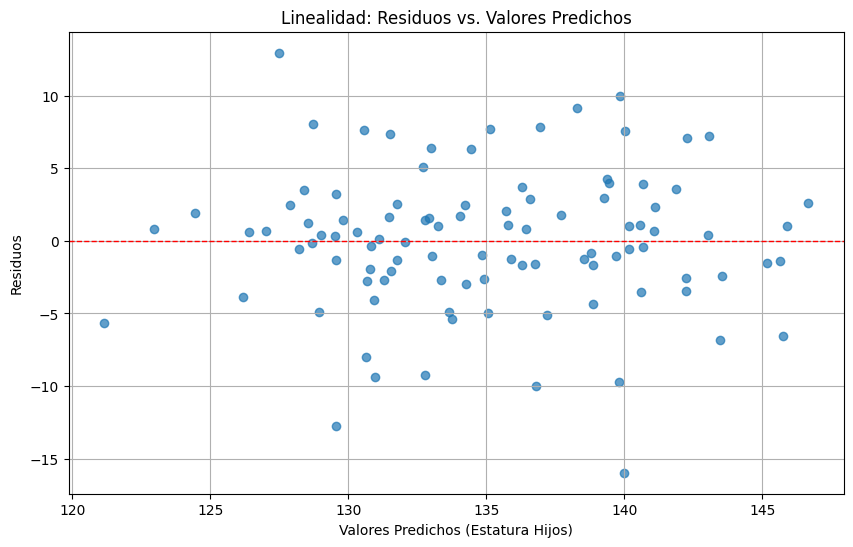

In [16]:
# Crear gráficos específicos para comparar residuos no correlacionados y residuos correlacionados


# Gráfico de residuos frente a los valores predichos
df_estatura['Residuos'] = df_estatura['Estatura_Hijos'] - df_estatura['Estatura_Hijos_Pred']

plt.figure(figsize=(10, 6))
plt.scatter(df_estatura['Estatura_Hijos_Pred'], df_estatura['Residuos'], alpha=0.7)
plt.axhline(y=0, color="red", linestyle="--", linewidth=1)
plt.title("Linealidad: Residuos vs. Valores Predichos")
plt.xlabel("Valores Predichos (Estatura Hijos)")
plt.ylabel("Residuos")
plt.grid(True)
plt.show()


El estadístico de Durbin-Watson es aproximadamente 
1.86
1.86.

Un valor de Durbin-Watson cercano a 2 sugiere que no hay autocorrelación en los residuos, lo cual cumple el supuesto de independencia de los errores.
Valores cercanos a 0 indican autocorrelación positiva, mientras que valores cercanos a 4 indican autocorrelación negativa.
En este caso, el valor de 
1.86
1.86 indica que no hay problemas significativos de autocorrelación, por lo que el supuesto de independencia de los errores se cumple.

3. Homocedasticidad

Independencia de los errores respecto a 𝑌
Definición: La independencia de los errores respecto a 𝑌 significa que los errores no deben estar relacionados con la variable dependiente que estamos tratando de predecir. 
Importancia: Si los errores están correlacionados con 𝑌 esto sugiere que la variabilidad en Y no se explica completamente con las variables independientes, lo que puede indicar que el modelo no captura correctamente la relación entre 𝑋 e 𝑌 Esto también puede implicar que existe heterocedasticidad, donde la variabilidad de los errores cambia dependiendo del valor de 𝑌 o de los valores de 𝑋.


In [17]:
import statsmodels.api as sm

# Prueba de Breusch-Pagan para la homocedasticidad
# Agregar una constante al modelo
X_with_const = sm.add_constant(df_estatura['Estatura_Padres'])
bp_test = sm.stats.diagnostic.het_breuschpagan(df_estatura['Residuos'], X_with_const)

# Resultados del test de Breusch-Pagan
bp_stat, bp_pvalue = bp_test[0], bp_test[1]
print(f"Estadístico de Breusch-Pagan: {bp_stat}")
print(f"p-valor de Breusch-Pagan: {bp_pvalue}")


Estadístico de Breusch-Pagan: 0.02649053219929698
p-valor de Breusch-Pagan: 0.8707080939481201


Para interpretar el resultado del test de Breusch-Pagan

Estadístico de Breusch-Pagan: Este valor refleja la magnitud de la heterocedasticidad detectada en los residuos del modelo. Sin embargo, el número exacto en sí no es tan relevante para tomar decisiones. En cambio, el p-valor asociado a este estadístico es lo que se utiliza para juzgar la significancia.

p-valor: El p-valor es la clave para interpretar la prueba. Compara el p-valor con un nivel de significancia común (como 0.05):

Si el p-valor es bajo (generalmente menor a 0.05 o 0.01), entonces se rechaza la hipótesis nula de homocedasticidad. Esto sugiere que existe heterocedasticidad significativa en el modelo, y la varianza de los errores cambia en función de las variables independientes.
Si el p-valor es alto (mayor a 0.05), no hay suficiente evidencia para rechazar la hipótesis nula de homocedasticidad. Esto indica que los residuos parecen tener varianza constante y que la heterocedasticidad no es un problema significativo en el modelo.

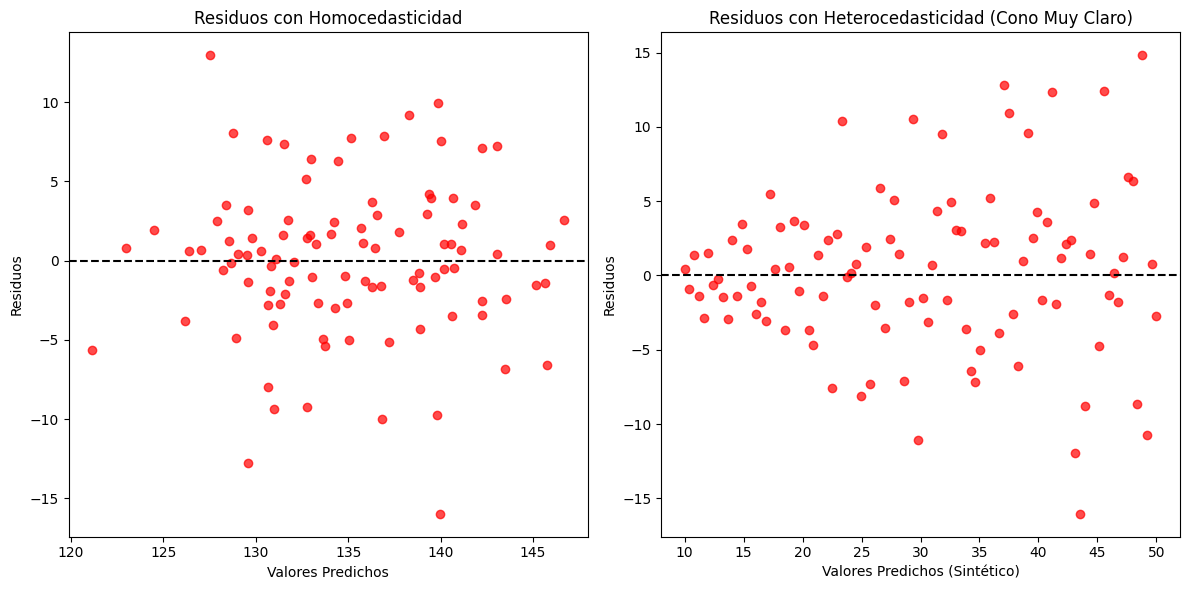

In [18]:
# Crear gráficos con datos completamente sintéticos para simular un caso de heterocedasticidad con un "cono" muy claro

# Generar valores predichos sintéticos
x_sintetico = np.linspace(10, 50, 100)

# Crear residuos con heterocedasticidad pronunciada (cono) para simular el efecto deseado
residuos_heterocedasticidad_cono_sintetico = np.random.normal(0, 1, 100) * np.linspace(1, 10, 100)

plt.figure(figsize=(12, 6))

# Gráfico de residuos con homocedasticidad usando datos originales
plt.subplot(1, 2, 1)
plt.scatter(df_estatura['Estatura_Hijos_Pred'], df_estatura['Residuos'], alpha=0.7, color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuos con Homocedasticidad")
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")

# Gráfico de residuos sintéticos con heterocedasticidad en forma de cono muy claro
plt.subplot(1, 2, 2)
plt.scatter(x_sintetico, residuos_heterocedasticidad_cono_sintetico, alpha=0.7, color='red')
plt.axhline(0, color='black', linestyle='--')
plt.title("Residuos con Heterocedasticidad (Cono Muy Claro)")
plt.xlabel("Valores Predichos (Sintético)")
plt.ylabel("Residuos")

plt.tight_layout()
plt.show()


4. Normalidad de los residuos

 Errores están distribuidos de forma normal, es decir, siguen una distribución normal con una media de cero. Esta es una suposición clave en la regresión lineal y otros modelos estadísticos, ya que garantiza la validez de inferencias estadísticas, como la construcción de intervalos de confianza y la realización de pruebas de hipótesis.


Resultados de la Prueba de Shapiro-Wilk para Residuos Normales:
Estadístico de Shapiro-Wilk: 0.9888379935873263
p-valor de Shapiro-Wilk: 0.5718804768884322

Resultados de la Prueba de Shapiro-Wilk para Residuos No Normales:
Estadístico de Shapiro-Wilk: 0.7836176168186411
p-valor de Shapiro-Wilk: 8.013137812927239e-11



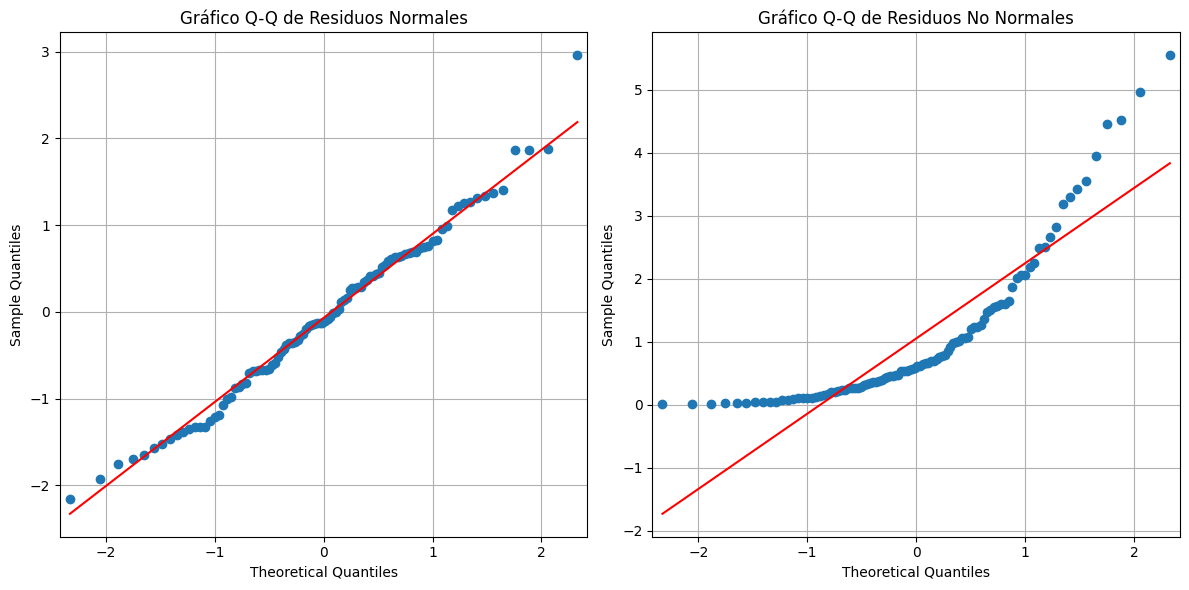

In [19]:

# Generar residuos que no siguen una distribución normal (distribución exponencial)
residuos_no_normales = np.random.exponential(scale=1, size=100)

# Crear un DataFrame para almacenar los residuos simulados
df_estatura_no_normal = pd.DataFrame({'Residuos': residuos_no_normales})

# Prueba de Shapiro-Wilk para verificar la normalidad en residuos no normales
shapiro_stat, shapiro_pvalue = stats.shapiro(df_estatura_no_normal['Residuos'])

# Generar residuos que siguen una distribución normal para comparación
residuos_normales = np.random.normal(loc=0, scale=1, size=100)
df_estatura_normal = pd.DataFrame({'Residuos': residuos_normales})

# Prueba de Shapiro-Wilk para verificar la normalidad en residuos normales
shapiro_stat_normal, shapiro_pvalue_normal = stats.shapiro(df_estatura_normal['Residuos'])

# Imprimir los resultados de la prueba de Shapiro-Wilk para ambos casos
print("Resultados de la Prueba de Shapiro-Wilk para Residuos Normales:")
print(f"Estadístico de Shapiro-Wilk: {shapiro_stat_normal}")
print(f"p-valor de Shapiro-Wilk: {shapiro_pvalue_normal}\n")

print("Resultados de la Prueba de Shapiro-Wilk para Residuos No Normales:")
print(f"Estadístico de Shapiro-Wilk: {shapiro_stat}")
print(f"p-valor de Shapiro-Wilk: {shapiro_pvalue}\n")

# Gráficos Q-Q para ambos conjuntos de residuos (normales y no normales) lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Gráfico Q-Q de residuos normales
sm.qqplot(df_estatura_normal['Residuos'], line='s', ax=axes[0])
axes[0].set_title("Gráfico Q-Q de Residuos Normales")
axes[0].grid(True)

# Gráfico Q-Q de residuos no normales
sm.qqplot(df_estatura_no_normal['Residuos'], line='s', ax=axes[1])
axes[1].set_title("Gráfico Q-Q de Residuos No Normales")
axes[1].grid(True)

plt.tight_layout()
plt.show()


El valor del estadistico no es tan relevante como el valor P. Con un p-valor mayor a 0.05, no se rechaza la hipótesis nula de normalidad. Esto significa que hay suficiente evidencia para suponer que estos residuos son normales.


Validación cruzada

## Desplegarlo

In [20]:
!pip install flask 

Defaulting to user installation because normal site-packages is not writeable


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Python313\python.exe -m pip install --upgrade pip


Exportamos el modelo

In [ ]:
# Ajustar el modelo de regresión lineal
modelo = LinearRegression()
X = df_estatura[['Estatura_Padres']]
y = df_estatura['Estatura_Hijos']
modelo.fit(X, y) 

import pickle
# Guardar el modelo entrenado
with open('modelo_entrenado.pkl', 'wb') as file:
     pickle.dump(modelo, file)

In [22]:
from flask import Flask, render_template, request
from sklearn.linear_model import LinearRegression
import numpy as np
import pickle

# Cargar el modelo desde el archivo .pkl
with open('modelo_entrenado.pkl', 'rb') as file:
    modelo = pickle.load(file)

# Extraer los coeficientes del modelo entrenado
beta_0 = modelo.intercept_  # Intercepto
beta_1 = modelo.coef_[0]    # Pendiente

# Inicializa la aplicación Flask
app = Flask(__name__)

# Ruta principal para la página de inicio
@app.route('/', methods=['GET', 'POST'])
def index():
    resultado = None
    if request.method == 'POST':
        # Obtener la estatura de los padres ingresada por el usuario
        estatura_padres = request.form.get('estatura_padres')
        
        try:
            # Convertir la entrada a float y calcular la estatura del hijo
            estatura_padres = float(estatura_padres)
            estatura_hijo_predicha = beta_0 + beta_1 * estatura_padres
            resultado = f"Predicción de estatura del hijo: {estatura_hijo_predicha:.2f} cm"
        except ValueError:
            resultado = "Por favor, ingresa un valor numérico válido para la estatura."
    
    # Renderizar el template HTML con el resultado
    return render_template('index.html', resultado=resultado)

# Ejecutar la aplicación
if __name__ == '__main__':
    app.run(debug=False)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [07/Feb/2025 20:42:55] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [07/Feb/2025 20:44:39] "POST / HTTP/1.1" 200 -
